# UK Traffic Accidents Analysis

Bu çalışmada, Veri Bilimi Patikasının Veri Bilimi Projeleri eğitiminde yapılması beklenen Trafik Kazaları Analizi Projesi'ni [UK traffic accidents veriseti](https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales) kullanarak gerçekleştirmeyi amaçladım.

Projede yapılan analizde aşağıdaki sorulara yanıtlar bulunması beklenmektedir:
- Trafik akışının değişmesi kazaları nasıl etkiler?
- Kaza oranlarını ne artırır?
- Zaman içinde kaza oranlarını tahmin edebilir miyiz?
- Kırsal ve kentsel alanlar nasıl farklılaştı?

# Paketlerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Verisetine İlk Bakış

2009'dan 2011'e kadar ve 2012'den 2014'e kadar raporlanmış kayıtları birleştirip daha geniş bir zaman aralığı için analiz yapılabilir. Birleştirilmiş tablodan rastgele 5 örneğe bakalım:

In [2]:
df1 = pd.read_csv("accidents_2009_to_2011.csv\\accidents_2009_to_2011.csv")
df2 = pd.read_csv("accidents_2012_to_2014.csv\\accidents_2012_to_2014.csv")

all_set = pd.concat([df1, df2], axis=0)
data = all_set.copy()

In [3]:
print("----------------------------------<2009-2011>----------------------------------------","\n")
print(df1.info(),"\n")
print(f"Total null entries at df1: {df1.isna().sum().sum()} \n")
print("----------------------------------<2012-2014>----------------------------------------","\n")
print(df2.info(),"\n")
print(f"Total null entries at df2: {df2.isna().sum().sum()} \n")

----------------------------------<2009-2011>---------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469442 entries, 0 to 469441
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               469442 non-null  object 
 1   Location_Easting_OSGR                        469442 non-null  int64  
 2   Location_Northing_OSGR                       469442 non-null  int64  
 3   Longitude                                    469442 non-null  float64
 4   Latitude                                     469442 non-null  float64
 5   Police_Force                                 469442 non-null  int64  
 6   Accident_Severity                            469442 non-null  int64  
 7   Number_of_Vehicles                           469442 non-null  int64  
 8   Number_of_Casualties                         4

Veriye ait genel bilgileri gördük. Bir de rastgele 5 örnek üzerinden neye benzediğine bakalım.

In [4]:
data.sample(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
214718,2.01013E+12,411460,419630,-1.828008,53.673013,13,3,2,2,19/06/2010,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01010901,2010
419887,201143P312071,454240,204370,-1.215952,51.735377,43,3,2,2,31/07/2011,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01028533,2011
322032,201101FH10413,522620,180090,-0.234580,51.506394,1,3,1,1,01/09/2011,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01001960,2011
265890,20134100T1137,511020,205480,-0.393611,51.736994,41,3,3,1,27/10/2013,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,2,Yes,E01023722,2013
90690,200934ND52289,457910,259280,-1.153557,52.228647,34,3,2,1,04/12/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Frost/Ice,None,None,2,Yes,E01026993,2009


Her özelliğe ait eşsiz değer sayısını ve bunların ne olduğuna bakmak istiyorum.

In [5]:
for i in data.columns:
    print("{} ({}) : \n{}".format(i, len(data[i].unique()), data[i].unique()))
    print("-----------------------------------------------------------------")

Accident_Index (561394) : 
['200901BS70001' '200901BS70002' '200901BS70003' ... '201497UD20501'
 '201497UD20601' '201497UD20801']
-----------------------------------------------------------------
Location_Easting_OSGR (179946) : 
[524910 525050 526490 ... 321509 323869 314072]
-----------------------------------------------------------------
Location_Northing_OSGR (213702) : 
[180800 181040 177990 ... 574063 566853 579971]
-----------------------------------------------------------------
Longitude (722260) : 
[-0.201349 -0.199248 -0.179599 ... -3.230826 -3.191397 -3.348426]
-----------------------------------------------------------------
Latitude (692682) : 
[51.512273 51.514399 51.486668 ... 54.985668 54.990446 55.1067  ]
-----------------------------------------------------------------
Police_Force (51) : 
[ 1 48  3  4  5  6  7 10 11 12 13 14 16 17 20 21 22 23 30 31 32 33 34 35
 36 37 40 41 42 43 44 45 46 47 50 52 53 54 55 60 61 62 63 91 92 93 94 95
 96 97 98]
----------------------

Special_Conditions_at_Site (9) : 
['None' 'Roadworks' 'Road surface defective' 'Auto traffic singal out'
 'Ol or diesel' 'Permanent sign or marking defective or obscured'
 'Auto traffic signal partly defective' 'Mud' nan]
-----------------------------------------------------------------
Carriageway_Hazards (7) : 
['None' 'Pedestrian in carriageway (not injured)'
 'Other object in carriageway' 'Any animal (except a ridden horse)'
 'Involvement with previous accident'
 'Dislodged vehicle load in carriageway' nan]
-----------------------------------------------------------------
Urban_or_Rural_Area (2) : 
[1 2]
-----------------------------------------------------------------
Did_Police_Officer_Attend_Scene_of_Accident (3) : 
['Yes' 'No' nan]
-----------------------------------------------------------------
LSOA_of_Accident_Location (35266) : 
['E01002882' 'E01002886' 'E01002912' ... 'W01001844' 'W01001914'
 'W01001921']
-----------------------------------------------------------------
Ye

Junction_Detail kolonunda null olmayan hiç veri olmadığı görünüyor. Yani bu özellik için geçerli hiçbir girdi yok. Aynı şekilde Accident_Index bizim için anlamlı olmayacağı için bunları düşürebiliriz.

Kazaların gerçekleşme saatine göre trafik akışının yoğunluğunun kaza gerçekleşme olasılığı üzerindeki etkisini anlamak için "Time" özelliğini kullanarak "Hour" isimli yeni bir özellik yaratıyorum. Günü 4'er saatlik 6 parçaya bölerek bunu daha kolay gerçekleştirebiliriz. Eğer daha detaylı bir analiz gerekirse her saat aralığı için "Time" özelliğini kullanıp inceleyebiliriz.

In [6]:
data.dropna(axis=1, how="all", inplace=True)
data.drop(["Accident_Index","LSOA_of_Accident_Location"], axis=1, inplace=True)
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data["Hour"] = pd.to_datetime(data["Time"]).dt.hour
data["Hour"] = pd.cut(data["Hour"], bins=[0,4,8,12,16,20,24], include_lowest=True, labels=["0-4","4-8","8-12","12-16","16-20","20-24"])
data.drop("Date", axis=1, inplace=True)
data.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Month,Day,Hour
0,524910,180800,-0.201349,51.512273,1,2,2,1,5,15:11,...,Fine without high winds,Dry,None,None,1,Yes,2009,1,1,12-16
1,525050,181040,-0.199248,51.514399,1,2,2,11,2,10:59,...,Fine without high winds,Wet/Damp,None,None,1,Yes,2009,5,1,8-12
2,526490,177990,-0.179599,51.486668,1,3,2,1,1,14:19,...,Fine without high winds,Dry,None,None,1,Yes,2009,4,1,12-16
3,524800,180300,-0.203110,51.507804,1,2,2,1,2,08:10,...,Other,Frost/Ice,None,None,1,Yes,2009,5,1,4-8
4,526930,177490,-0.173445,51.482076,1,2,2,1,3,17:25,...,Fine without high winds,Dry,None,None,1,Yes,2009,6,1,16-20


Text(0.5, 1.0, 'Number of Casualties')

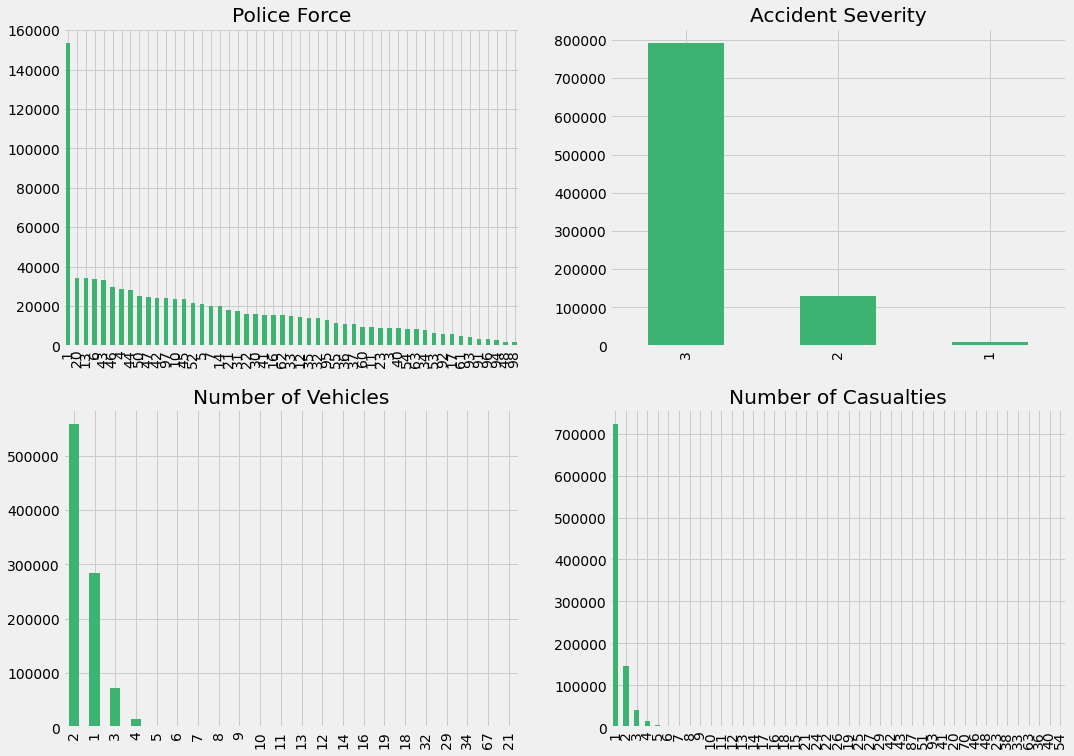

In [34]:
fig = plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
data["Police_Force"].value_counts().plot(kind="bar", color="mediumseagreen")
plt.title("Police Force")

plt.subplot(2,2,2)
data["Accident_Severity"].value_counts().plot(kind="bar", color="mediumseagreen")
plt.title("Accident Severity")

plt.subplot(2,2,3)
data["Number_of_Vehicles"].value_counts().plot(kind="bar", color="mediumseagreen")
plt.title("Number of Vehicles")

plt.subplot(2,2,4)
data["Number_of_Casualties"].value_counts().plot(kind="bar", color="mediumseagreen")
plt.title("Number of Casualties")

- En çok raporlanmış kaza 1 numaralı polis gücüne ait. Bunun sebeb 1 numaralı ekibin sorumlu olduğu bölgenin nüfusu ve trafik akış yoğunluğu diğerlerininkinden fazla olmasından kaynaklanıyor olabilir.
- Önem derecesine göre kazalar çoğunlukla 3.seviyede.
- Kazaya karışn araç sayısı genellikle 2 olmakla birlikte bu sayının 67'ye kadar ulaştığı durumlar var.
- Çoğunlukla kazazede sayısı 1.


- The most reporting police force is 1. The reason could be the area police force 1 is responsible for have more population and traffic flow than others.
- Mostly accident severity is 3.
- The number of vehicles involved in the accident is generally 2 but there are cases this number reaches 67. And number of casuality is 1.

In [8]:
print("Boylam aralığı: ",min(data["Longitude"]), ",", max(data["Longitude"]))
print("Enlem aralığı: ",min(data["Latitude"]), ",", max(data["Latitude"]))

Boylam aralığı:  -7.516225 , 1.759398
Enlem aralığı:  49.912941 , 60.662043


In [9]:
data["Longitude_"] = pd.cut(data["Longitude"], 8, include_lowest=True, ordered=True)
data["Latitude_"] = pd.cut(data["Latitude"], 10, include_lowest=True, ordered=True)
data.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Month,Day,Hour,Longitude_,Latitude_
0,524910,180800,-0.201349,51.512273,1,2,2,1,5,15:11,...,None,None,1,Yes,2009,1,1,12-16,"(-0.56, 0.6]","(50.988, 52.063]"
1,525050,181040,-0.199248,51.514399,1,2,2,11,2,10:59,...,None,None,1,Yes,2009,5,1,8-12,"(-0.56, 0.6]","(50.988, 52.063]"
2,526490,177990,-0.179599,51.486668,1,3,2,1,1,14:19,...,None,None,1,Yes,2009,4,1,12-16,"(-0.56, 0.6]","(50.988, 52.063]"
3,524800,180300,-0.203110,51.507804,1,2,2,1,2,08:10,...,None,None,1,Yes,2009,5,1,4-8,"(-0.56, 0.6]","(50.988, 52.063]"
4,526930,177490,-0.173445,51.482076,1,2,2,1,3,17:25,...,None,None,1,Yes,2009,6,1,16-20,"(-0.56, 0.6]","(50.988, 52.063]"


## Kazalar en çok hangi bölgede gerçekleşmiş?

In [10]:
print("Kazaların en çok gerçekleştiği bölgenin coğrafi koordinatları:\n")
print(data["Longitude_"].value_counts(),"\n")
print(data["Latitude_"].value_counts())

Kazaların en çok gerçekleştiği bölgenin coğrafi koordinatları:

(-0.56, 0.6]        291430
(-1.719, -0.56]     233140
(-2.878, -1.719]    215774
(-4.038, -2.878]    106466
(0.6, 1.759]         42113
(-5.197, -4.038]     41933
(-6.357, -5.197]      3076
(-7.527, -6.357]       207
Name: Longitude_, dtype: int64 

(50.988, 52.063]    368293
(53.138, 54.213]    204071
(52.063, 53.138]    175675
(49.901, 50.988]     75729
(54.213, 55.287]     52065
(55.287, 56.362]     44352
(56.362, 57.437]      9866
(57.437, 58.512]      3635
(58.512, 59.587]       274
(59.587, 60.662]       179
Name: Latitude_, dtype: int64


Kaza rapor edilen en sık bölge (-0.56, 0.6] boylamları ve (50.988, 52.063] enlemleri arasında kalan bölgeyi işaret ediyor.

## Çevre koşullarının kazalara etkisi nasıl?

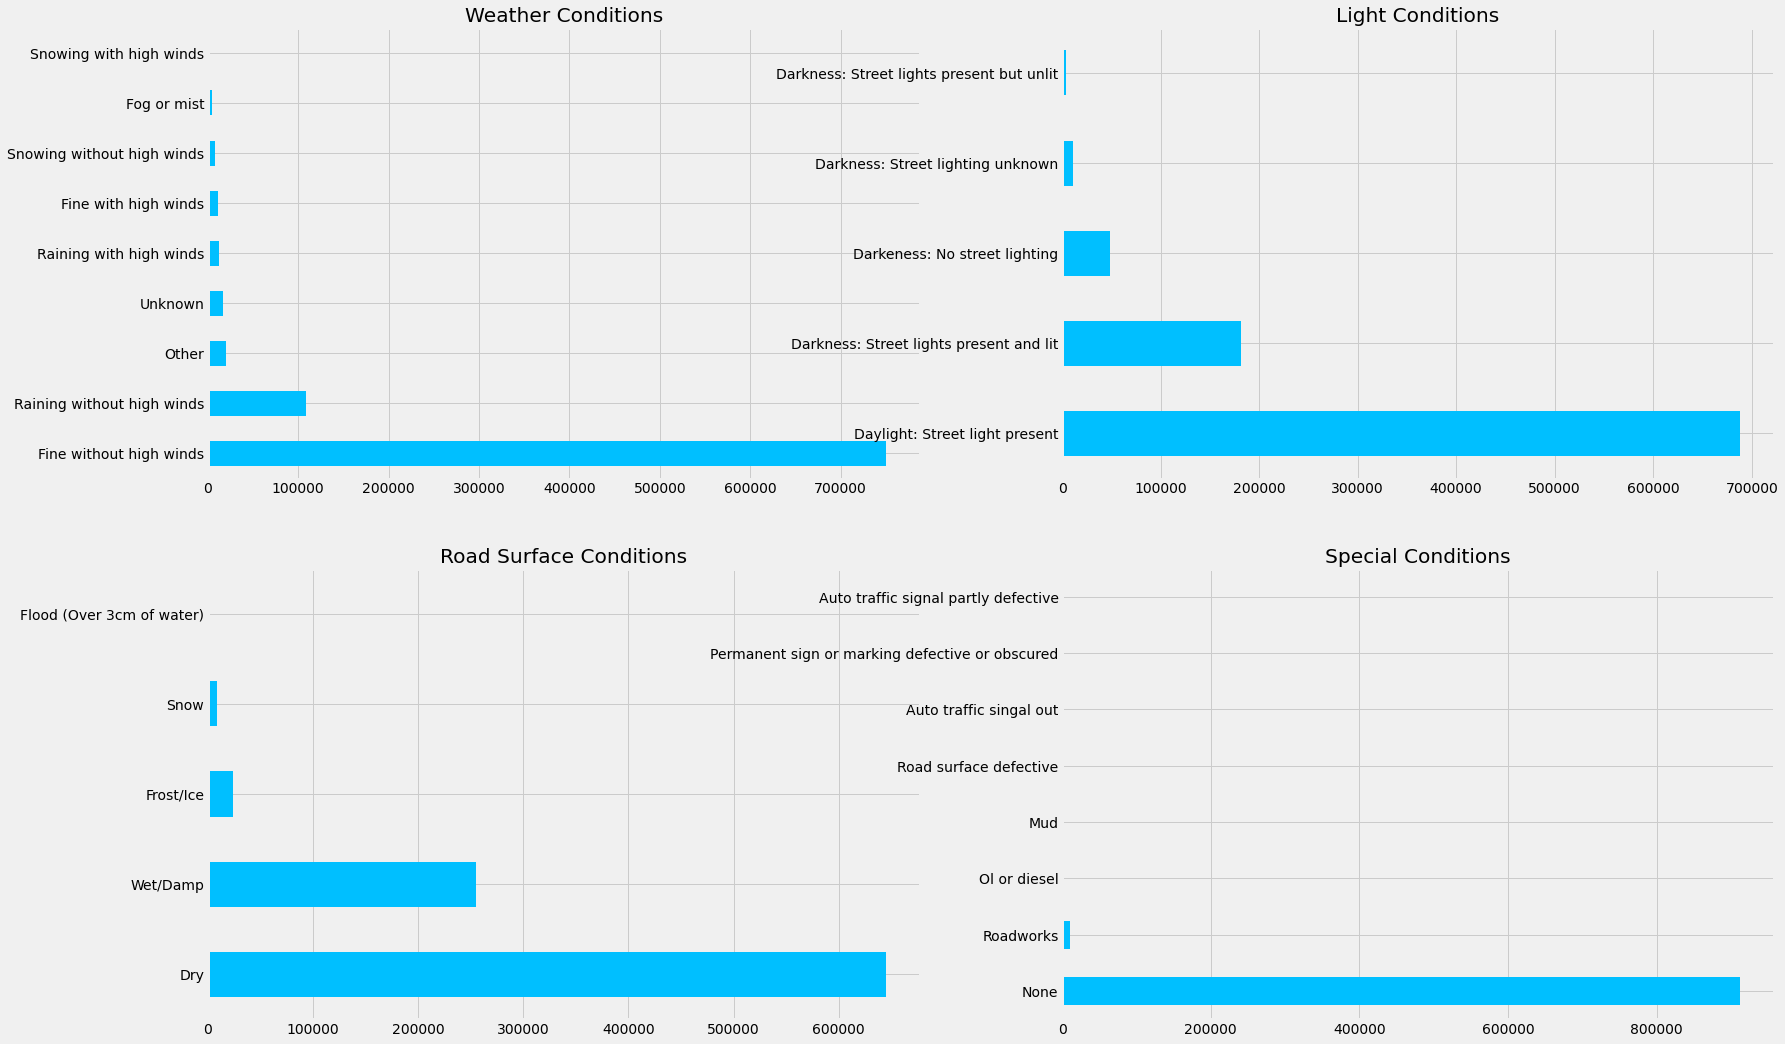

In [11]:
fig = plt.figure(figsize=(25,17))

plt.subplot(2,2,1)
data["Weather_Conditions"].value_counts().plot(kind="barh", color="deepskyblue")
plt.title("Weather Conditions")

plt.subplot(2,2,2)
data["Light_Conditions"].value_counts().plot(kind="barh", color="deepskyblue")
plt.title("Light Conditions")

plt.subplot(2,2,3)
data["Road_Surface_Conditions"].value_counts().plot(kind="barh", color="deepskyblue")
plt.title("Road Surface Conditions")

plt.subplot(2,2,4)
data["Special_Conditions_at_Site"].value_counts().plot(kind="barh", color="deepskyblue")
plt.title("Special Conditions")

plt.show()

Kazaların çoğu;
- Sert rüzgarın olmadığı açık havada
- Sokak ışıklandırmasının olduğu günışığında
- Islak yolda gerçekleşenlerinin kuru yolda gerçekleşenlerin yarısından daha az olduğu
- Neredeyse hepsi herhangi bir özel durumun olmadığı (kusurlu çalışan otomatik trafik lambası, çamur, kusurlu yol yüzeyi vb.)

şartlarda meydana gelmiş. Bu sonuçlara bakılarak kazalar için insan kaynaklı olduğunu söyleyebiliriz.

## Kaza Yeri

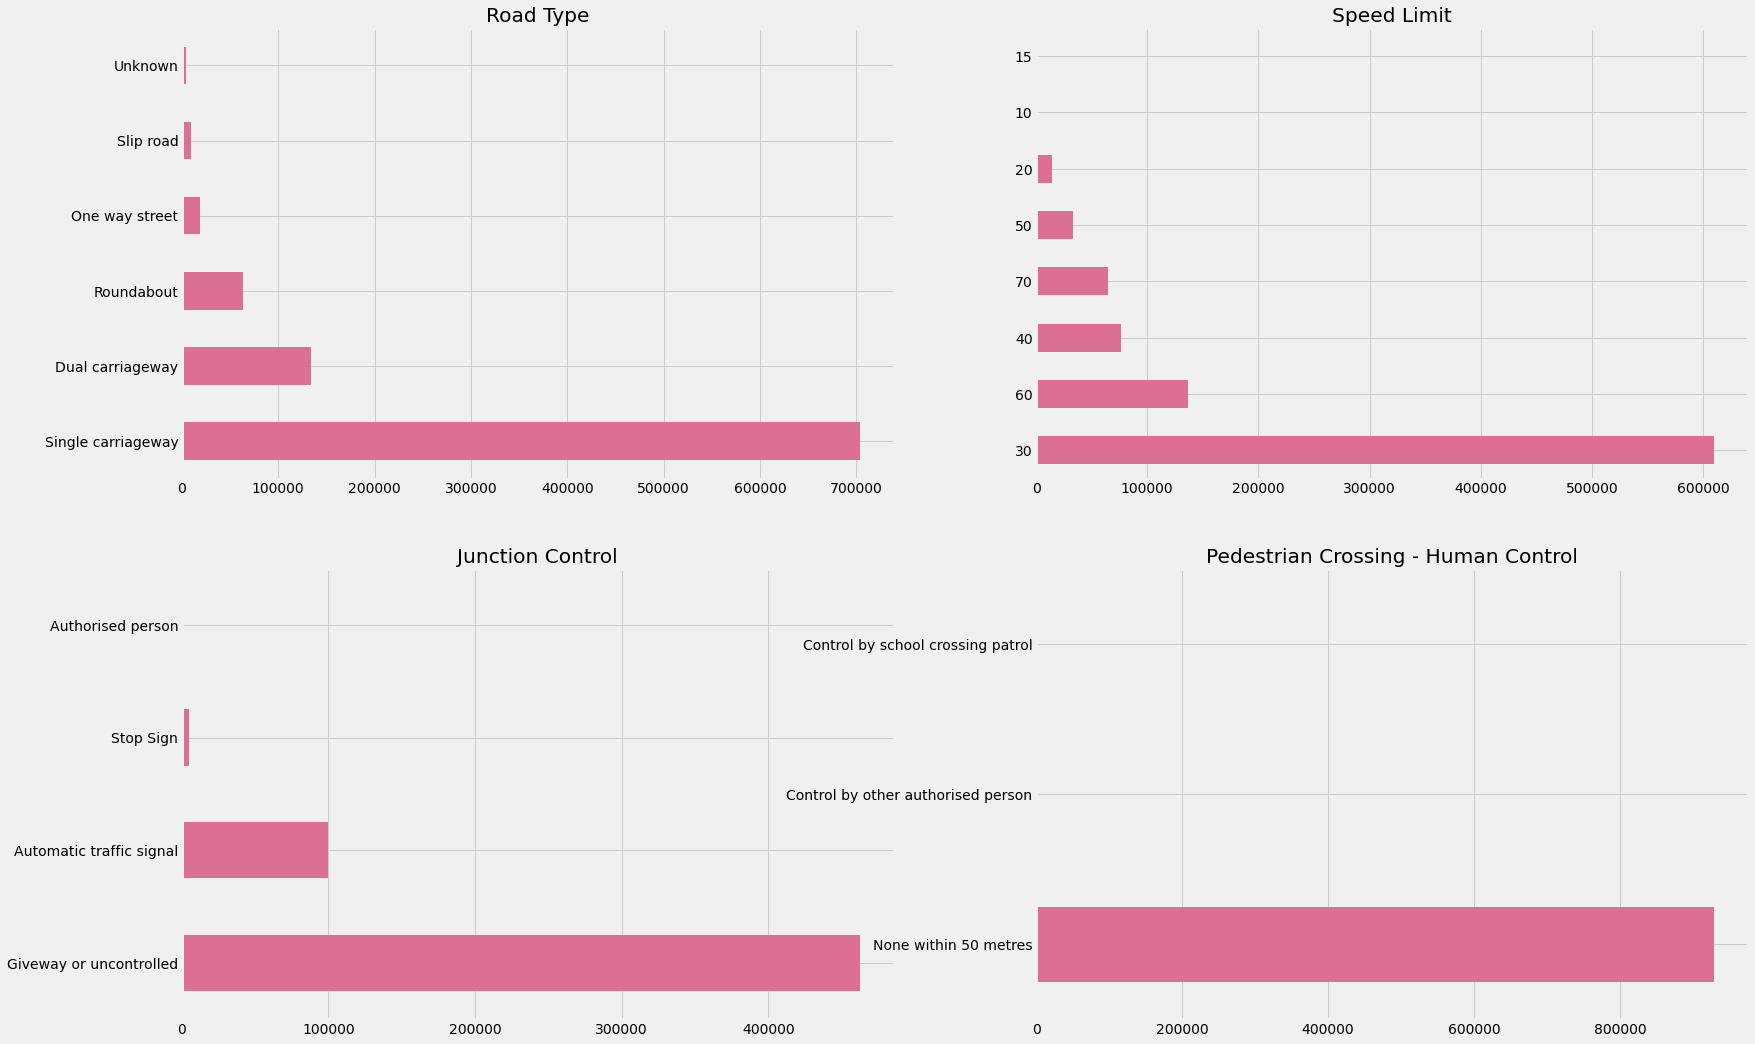

In [12]:
fig = plt.figure(figsize=(25,17))

plt.subplot(2,2,1)
data["Road_Type"].value_counts().plot(kind="barh", color="palevioletred")
plt.title("Road Type")

plt.subplot(2,2,2)
data["Speed_limit"].value_counts().plot(kind="barh", color="palevioletred")
plt.title("Speed Limit")

plt.subplot(2,2,3)
data["Junction_Control"].value_counts().plot(kind="barh", color="palevioletred")
plt.title("Junction Control")

plt.subplot(2,2,4)
data["Pedestrian_Crossing-Human_Control"].value_counts().plot(kind="barh", color="palevioletred")
plt.title("Pedestrian Crossing - Human Control")

plt.show()

## Kırsal ve Kentsel bölgelerde kaza sayısındaki değişim

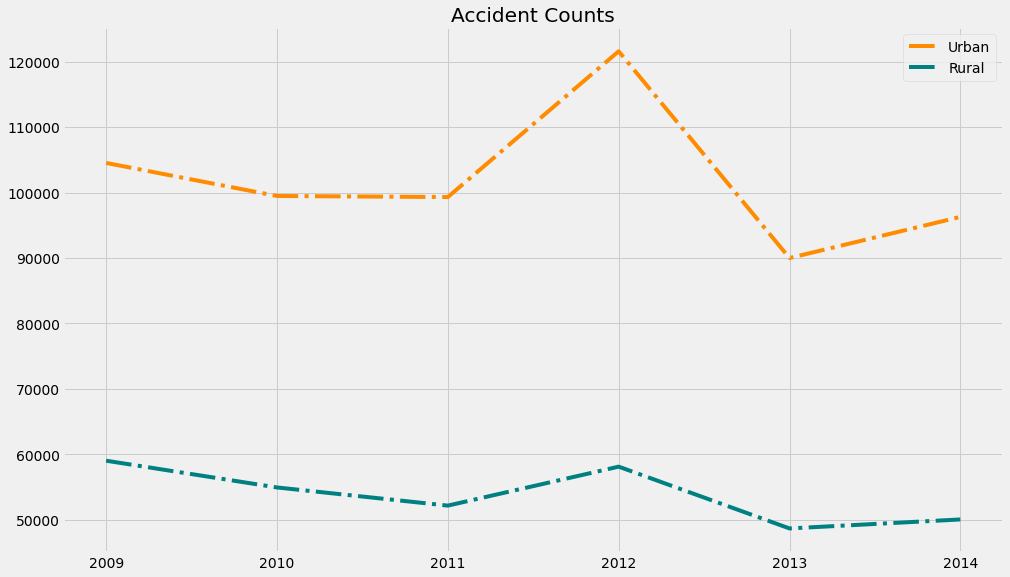

In [13]:
urban = data[data["Urban_or_Rural_Area"] == 1]
rural = data[data["Urban_or_Rural_Area"] == 2]

plt.figure(figsize=(15,9))
plt.plot(data["Year"].unique(), urban["Year"].value_counts(sort=False), "-.", label="Urban", color="darkorange")
plt.plot(data["Year"].unique(), rural["Year"].value_counts(sort=False), "-.", label="Rural", color="teal")
plt.legend(loc="best")
plt.title("Accident Counts")
plt.show()

## Kazaların zamana göre incelenmesi

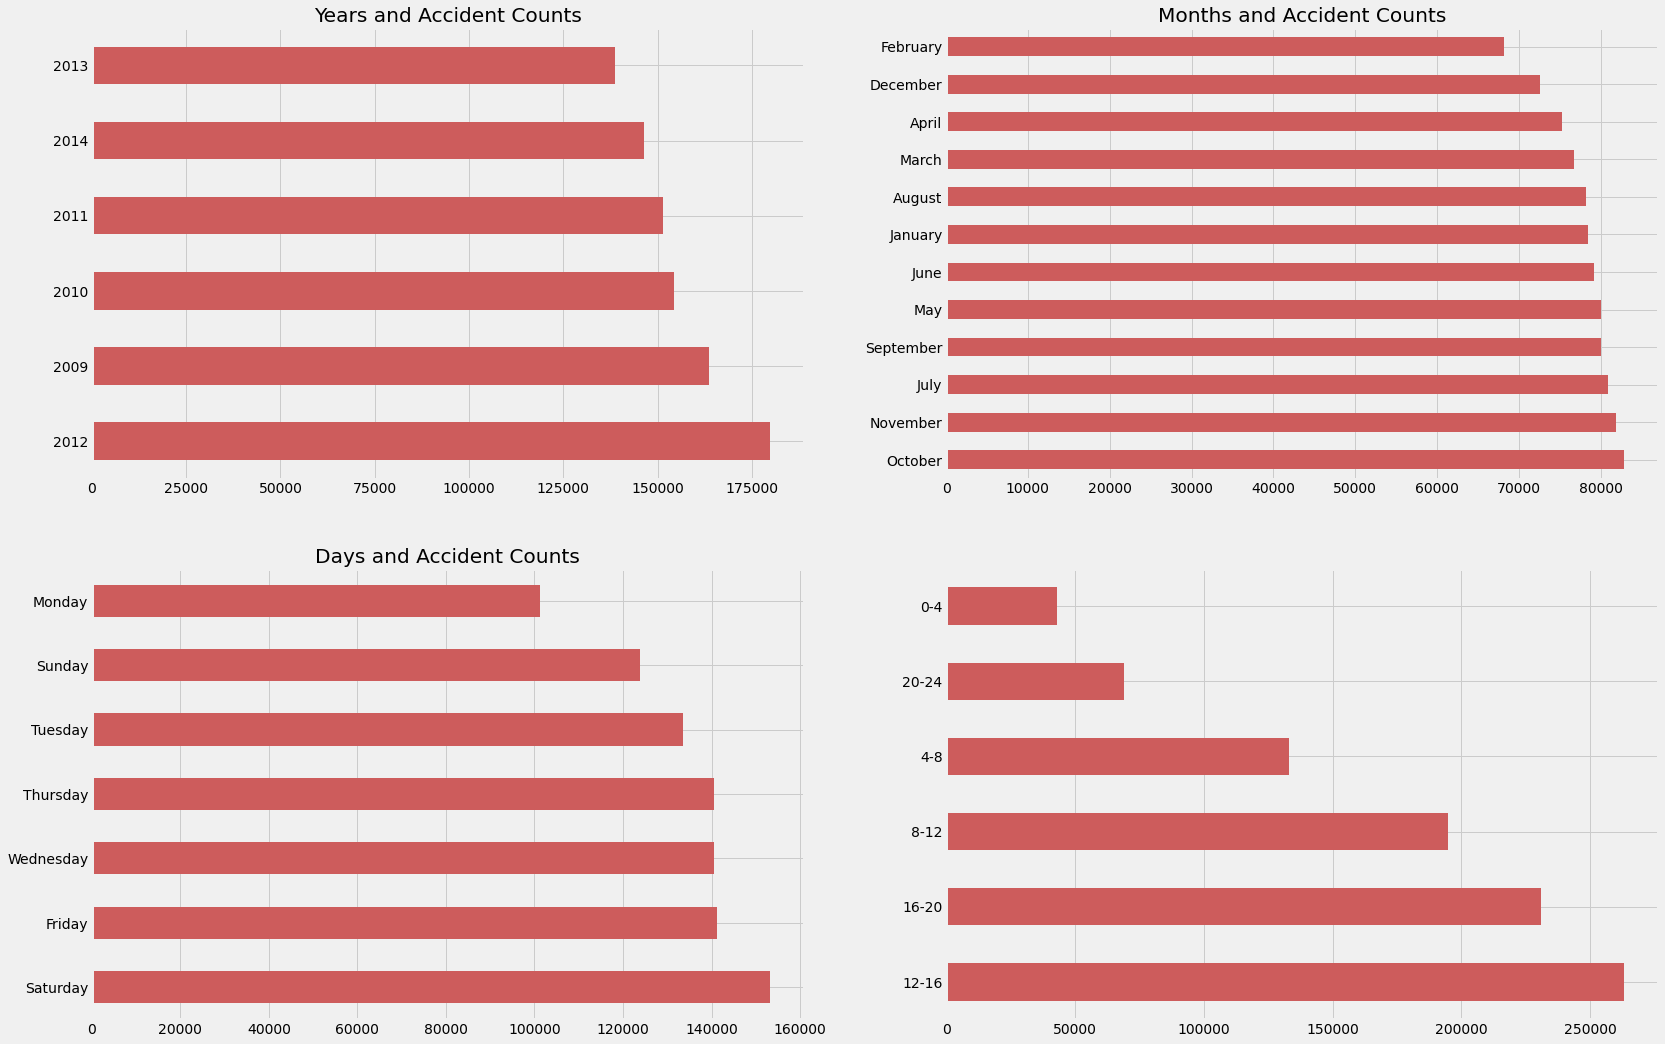

In [14]:
data["Day_of_Week"] = data["Day_of_Week"].astype(str)
data["Day_of_Week"] = data["Day_of_Week"].map({"1": "Monday", "2": "Tuesday", "3": "Wednesday", "4": "Thursday", "5": "Friday", "6": "Saturday", "7":"Sunday"})

data["Month"] = data["Month"].astype(str)
data["Month"] = data["Month"].map({"1": "January", "2": "February", "3": "March", "4": "April", "5": "May", "6": "June", "7": "July", "8": "August", "9": "September", "10": "October", "11": "November", "12": "December"})

fig = plt.figure(figsize=(25,17))

plt.subplot(2,2,1)
data["Year"].value_counts().plot(kind="barh", color="indianred")
plt.title("Years and Accident Counts")

plt.subplot(2,2,2)
data["Month"].value_counts().plot(kind="barh", color="indianred")
plt.title("Months and Accident Counts")

plt.subplot(2,2,3)
data["Day_of_Week"].value_counts().plot(kind="barh", color="indianred")
plt.title("Days and Accident Counts")

plt.subplot(2,2,4)
data["Hour"].value_counts().plot(kind="barh", color="indianred", sharex=False)
plt.title("Hours and Accident Counts")

plt.show()

Kazaların gerçekleşme zamanına göre bir yorum yapabileceğimiz belirgin özellik saat aralıklarına göre gerçekleşme sıklığı. Saat 12 ile 16 saatleri arasında kazalar daha çok gerçekleşiyor. Yaya ve araç yoğunluğunun en fazla olduğu saat aralığı olduğu düşünülünce bu beklenen bir durum.

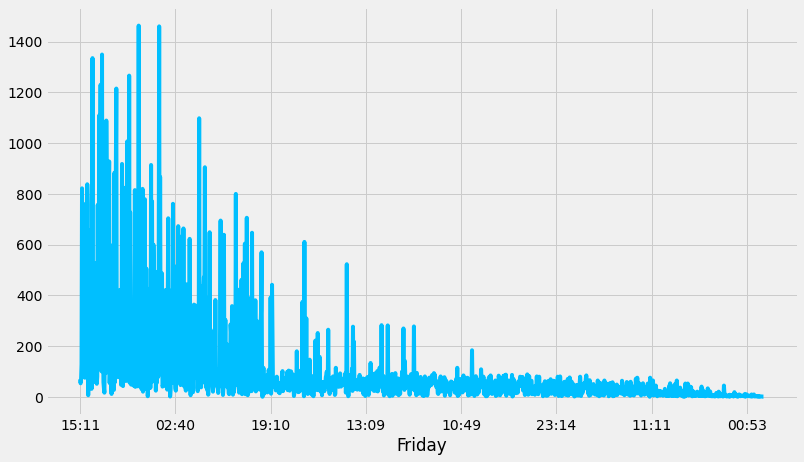

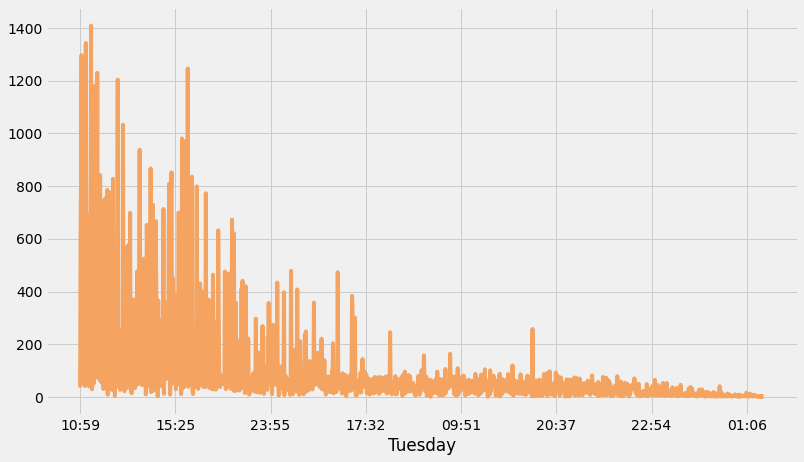

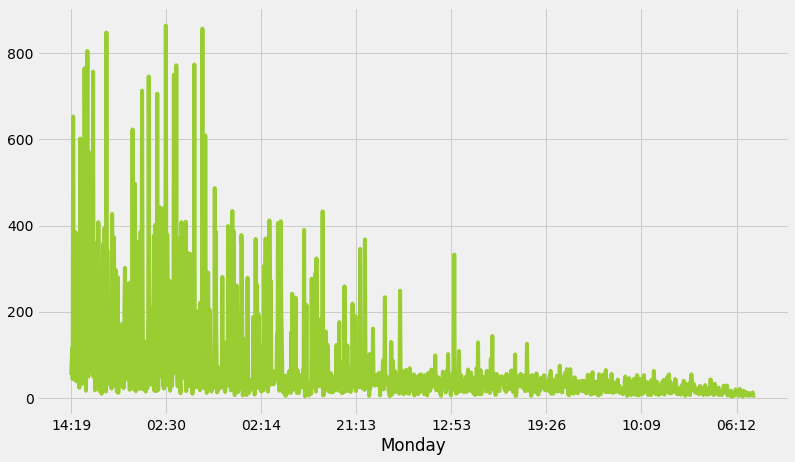

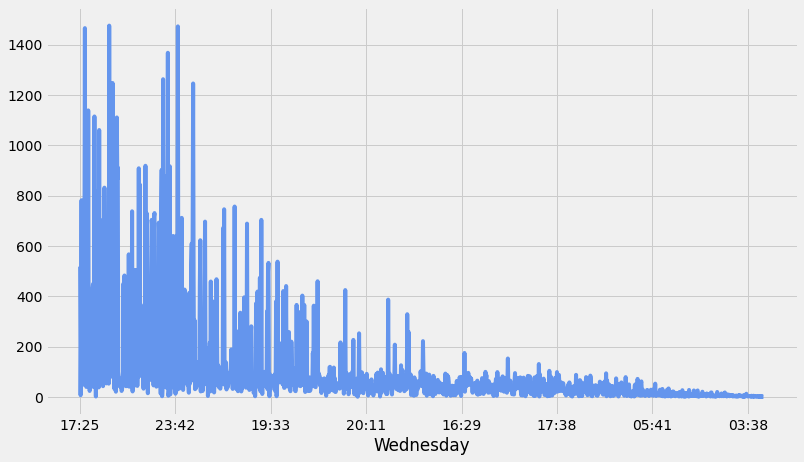

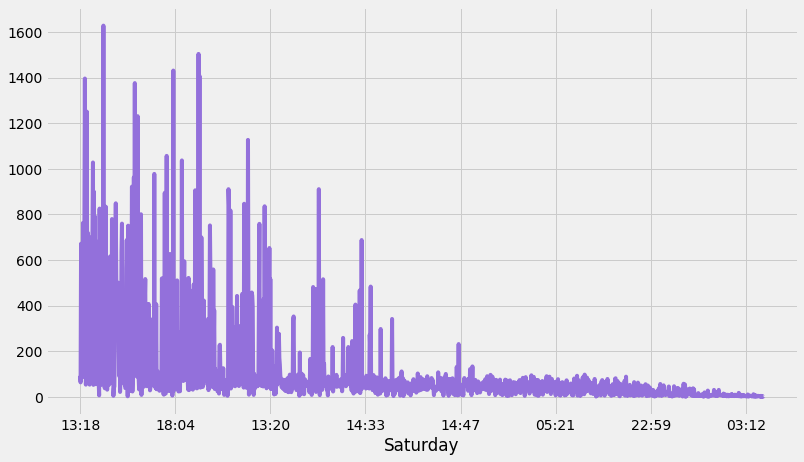

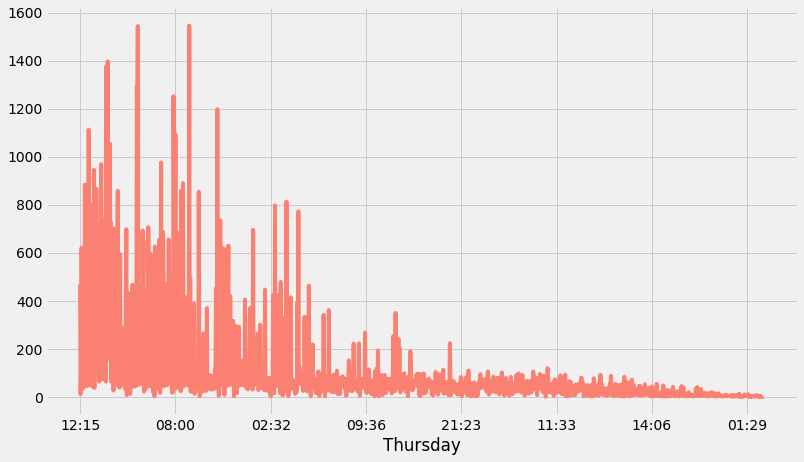

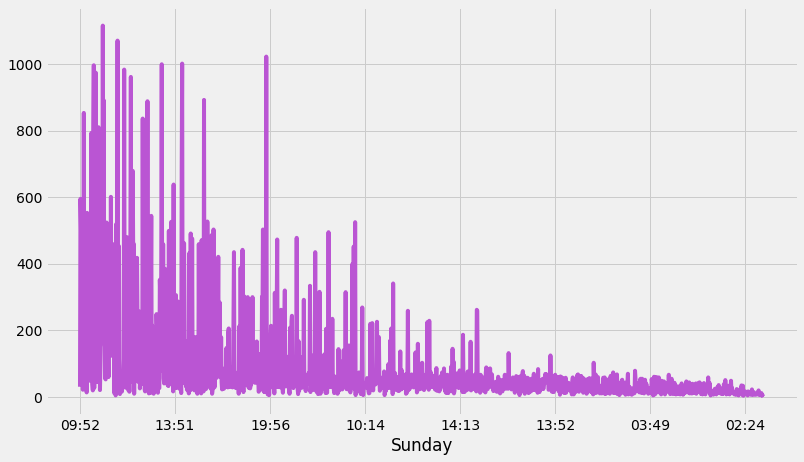

In [33]:
colors = ["deepskyblue", "sandybrown", "yellowgreen", "cornflowerblue", "mediumpurple", "salmon", "mediumorchid"]

for i,day in enumerate(data["Day_of_Week"].unique()):
    plt.figure(figsize=(12,7))
    data[data["Day_of_Week"] == day]["Time"].value_counts(sort=False).plot(color=colors[i])
    plt.xlabel(day)
    plt.show()

Bu notebookta trafik kazalarının sayılarını, gerçekleşme nedenlerini, gerçekleştikleri zaman aralıklarını, kırsal ve kentsel bölgelerde yıllara göre meydana gelme sayılarını görselleştirerek inceledim.

Analizi kolaylaştırmak için öznitelik mühendisliği (feature engineering) uygulayarak var olan veriden yeni öznitelikler ürettim.

Çıkarım yapmak için faydası olmayacak anlamsız özellikleri tablodan düşürdüm.


**Yorumlar**

- Kazalar araç ve yaya trafiğinin yoğun olduğu 12-16 saatleri arasında en çok gerçekleşmekte.
- Kazalar, şartların genel olarak günışığında ve trafik işaretlerinin mevcut, yol koşullarının kuru ve hava koşullarının kazaya sebebiyet vermeyecek açık ve rüzgarsız olduğu durumlarda meydana geldiği için kusurlu faktörün insan etkisi olduğu sonucuna varmak mümkün.
- Kazalar çoğunlukla küçük ölçekte olup kazazede sayısı genellikle 1 ve kazaya karışan araç sayısı 2. Kazaların önem derecesi bu yüzden düşük.
- 1 numaralı polis gücü en çok raporlanmış kaza verisine sahip. Bu, bu polis kuvvetinin sorumlu olduğu bölgenin özelliğinden kaynaklanabilmenin yanı sıra verinin elde edilmesindeki bir eşit olmayan dağılımdan da kaynaklanabilir.
- Sayı bakımından kırsal alanda gerçekleşen kaza sayısı kentsel alanda gerçekleşen kazaların sayısının yarısı civarı takip ederek bu iki alanda gerçekleşen kazalar paralel sayılabilecek bir biçimde artış ve azalma göstermiş. Bunun sebebini anlamak için o dönemlerde trafiğe yeni giren araç ve sürücü sayısı, göç, nüfus değişimi, trafik kurallarının ihlalinde uygulanacak yeni ceza ve yaptırımların uygulanması gibi sebepler incelenebilir.
- Kazalar, 30km/h'de en çok gerçekleşmiş. Kazazede ve kazaya karışan araç sayısıyla ilgili elde edilen bilgiler göz önüne alındığında kulağa mantıklı gelebilecek bir çıkarım. 